In [1]:
# Count Number of Storms by Category
import pandas as pd
import matplotlib.pyplot as plt
    

In [3]:
hurdat2 = pd.read_csv('hur.csv')

In [4]:
# Count Number of Storms by Category
def StormCountByCategory(hurdat2):
  grouped = hurdat2.groupby('Cat')['StormID'].unique().to_frame().reset_index()
  grouped['Num'] = grouped['StormID'].str.len()
  grouped.plot.bar(x='Cat', y='Num')
  plt.ylabel('Number of Storms')

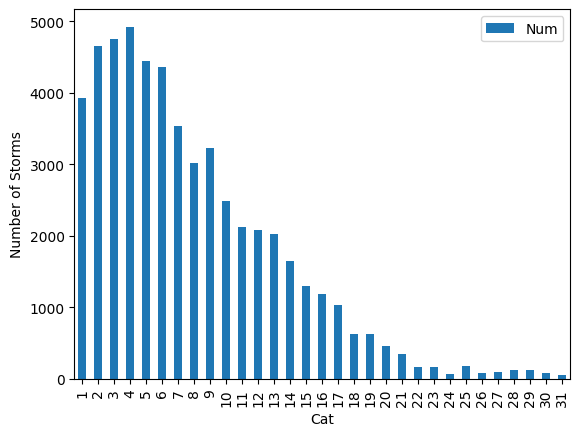

In [5]:
 StormCountByCategory(hurdat2)

In [6]:
# Seasonality
def HurrSeasonality(hurdat2):
  grouped_by_month = hurdat2.groupby('Month')['StormID'].unique().to_frame().reset_index()
  grouped_by_month['NumStorms'] = grouped_by_month['StormID'].str.len()
  grouped_by_month['Month'] = grouped_by_month['Month'].astype('int')
  grouped_by_month['NumStorms'] = grouped_by_month['NumStorms'].astype('int')
  plt.rcParams["figure.figsize"] =(20,5)
  grouped_by_month.plot.bar(x='Month', y='NumStorms')
  #plt.xticks(np.arange(grouped_by_month.Year.min(),grouped_by_year.Year.max(),25))
  plt.ylabel('No. of Storms')
  plt.suptitle('Storm Frequency by Month', fontsize=23)

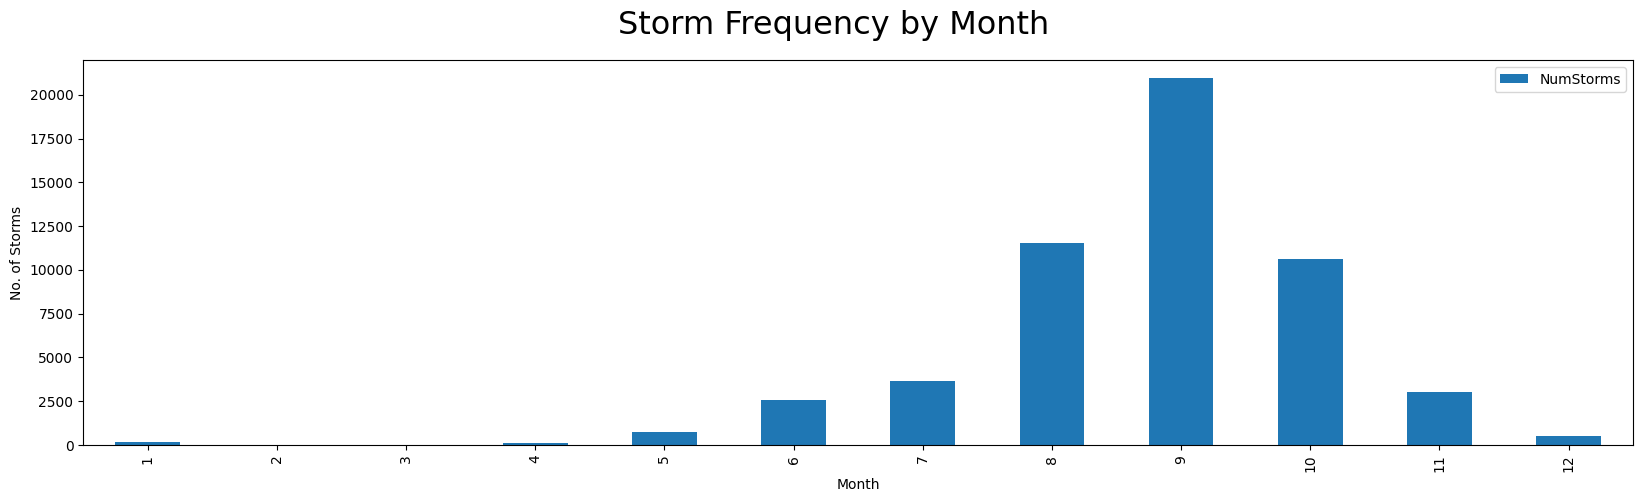

In [7]:
HurrSeasonality(hurdat2)

In [4]:
# Count Number of Storms by Category
def StormCountByCategory(hurdat2):
  grouped = hurdat2.groupby('Cat')['StormID'].unique().to_frame().reset_index()
  grouped['Num'] = grouped['StormID'].str.len()
  grouped.plot.bar(x='Cat', y='Num')
  plt.ylabel('Number of Storms')

# Cyclicality
def HurrCyclicality(hurdat2):
  grouped_by_year = hurdat2.groupby('Year')['StormID'].unique().to_frame().reset_index()
  grouped_by_year['NumStorms'] = grouped_by_year['StormID'].str.len()
  grouped_by_year['Year'] = grouped_by_year['Year'].astype('int')
  grouped_by_year['NumStorms'] = grouped_by_year['NumStorms'].astype('int')
  plt.rcParams["figure.figsize"] =(20,5)
  grouped_by_year.plot(x='Year', y='NumStorms',linewidth=3,linestyle = 'dashed')
  plt.xticks(np.arange(grouped_by_year.Year.min(),grouped_by_year.Year.max(),25))
  plt.ylabel('No. of Storms')
  plt.plot(grouped_by_year['Year'],grouped_by_year['NumStorms'].rolling(10).mean(),label= 'MA 10 years', linewidth=3)
  plt.plot(grouped_by_year['Year'],grouped_by_year['NumStorms'].rolling(25).mean(),label= 'MA 25 years', linewidth=3)
  plt.ylabel('No. of Storms')
  plt.xlabel('Year No.')
  plt.legend()
 
# Seasonality
def HurrSeasonality(hurdat2):
  grouped_by_month = hurdat2.groupby('Month')['StormID'].unique().to_frame().reset_index()
  grouped_by_month['NumStorms'] = grouped_by_month['StormID'].str.len()
  grouped_by_month['Month'] = grouped_by_month['Month'].astype('int')
  grouped_by_month['NumStorms'] = grouped_by_month['NumStorms'].astype('int')
  plt.rcParams["figure.figsize"] =(20,5)
  grouped_by_month.plot.bar(x='Month', y='NumStorms')
  #plt.xticks(np.arange(grouped_by_month.Year.min(),grouped_by_year.Year.max(),25))
  plt.ylabel('No. of Storms')
  plt.suptitle('Storm Frequency by Month', fontsize=23)

# Most Frequent Storm Name
def MostFreqStormNames(hurdat2):
  UniqueStorms = hurdat2.groupby(['StormID','StormName']).size().reset_index().rename(columns={0:'NoRecordings'})
  NameFreq = UniqueStorms.StormName.value_counts().reset_index().rename(columns={'index':'StrmName', 'StormName':'StrmCount'})
  HTML(NameFreq[:10].to_html())

# Helper function for Plotting Maps
import cartopy.crs as ccrs

def MapTemplate(plt_title):
    plt.figure(figsize=(10, 8))
    
    # Use PlateCarree projection for latitude/longitude plots
    m1 = plt.axes(projection=ccrs.PlateCarree())

    # Set the map extent
    m1.set_extent([-100, 30, 0, 57])

    # Add coastlines
    m1.coastlines()

    # Add parallels and meridians
    m1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.suptitle(plt_title, fontsize=16)
    return m1


# Storm Track of All Storms in Atlantic Basin
def AllStormTracks(hurdat2):
  m1 = MapTemplate("Atlantic Hurricane Historical Storms (1851-2014)")
  UniqueStorms = hurdat2.StormID.unique()
  for stormid, track in hurdat2.groupby('StormID'):
      lat_storm = track.Lat.values
      lon_storm = track.Lon.values
      x1, y1 = m1(lon_storm,lat_storm)
      plt.plot(x1,y1,'r-',linewidth=0.5)
  plt.title('Total Number of Storms = '+ str(len(UniqueStorms)))
  
# Storm Track of All Storms in Atlantic Basin
def LandFallingStormTracks(hurdat2):
  m = MapTemplate("Atlantic Hurricane : Landfalling Historical Storms (1851-2014)")
  LandfallStorms = hurdat2[hurdat2.RecIdentifier == " L"]
  LandfallStorms_Unique = LandfallStorms.StormID.unique()
  print ('Total number of Landfalling Storms = ', len(LandfallStorms_Unique))
  for stormid in LandfallStorms_Unique:
      temp_db = hurdat2[hurdat2.StormID == stormid]
      lat_storm = temp_db.Lat.values
      lon_storm = temp_db.Lon.values
      x1, y1 = m(lon_storm,lat_storm)
      plt.plot(x1,y1,'g-',linewidth=0.5)
  plt.title('Total Number of Storms = '+ str(len(LandfallStorms_Unique)))

# Storm Track of All Storms in Atlantic Basin
def StormGenesis(hurdat2):
  m = MapTemplate("Atlantic Hurricane Storm Genesis (1851-2014)")
  UniqueStorms = hurdat2.StormID.unique()
  Genesis = hurdat2.groupby('StormID').first()
  longitude = Genesis.Lon.values
  latitude = Genesis.Lat.values
  cat = Genesis.Cat.values
  x, y = m(longitude, latitude)
  plt.scatter(x,y,color='m',marker='D',s=4)
  plt.title('Total Number of Unique Storms = %d' % (len(UniqueStorms)))

ModuleNotFoundError: No module named 'cartopy'

In [3]:
import sys
!{sys.executable} conda --version

C:\Users\carre\AppData\Local\Programs\Python\Python312\python.exe: can't open file 'C:\\Users\\carre\\OneDrive\\Desktop\\Big Data\\HURDAT2\\conda': [Errno 2] No such file or directory
